<a href="https://colab.research.google.com/github/sky16k/MDS/blob/main/MDS08_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [ ]:
### YOUR CODE/SOLUTION HERE
p1 = 0.2
p2 = 0.3
p3 = 0.5
p1a = 0.1
p2a = 0.05
p3a = 0.2
pA = p1*p1a + p2*p2a + p3*p3a
pA

0.135

### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [ ]:
### YOUR SOLUTION HERE
потому, что при выполнении любых 2-х - третье окажется выполненным автоматически

пусть b1,b2,b3 = 1 если решка выпала на монетах 1,2,3 соответственно
и b1,b2,b3 = 0 если выпал орёл

тогда a1 = 1 при b1=b2
a2 = 1 при b2=b3
a3 = 1 при b1=b3

пусть случилось a1 и a2:
b2=b1 и b2=b3
тогда b1=b3, то есть a3=1



## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html).

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 1)


В общем виде функция плотности для этих 3-х распределений задаётся следующим образом:

{тип распределения}.pdf(x, df, loc=0, scale=1)

где 
- x - область определения
- a df(только для t), loc и scale - задаваемые параметры.

будем работать с каждым по отдельности

####loc

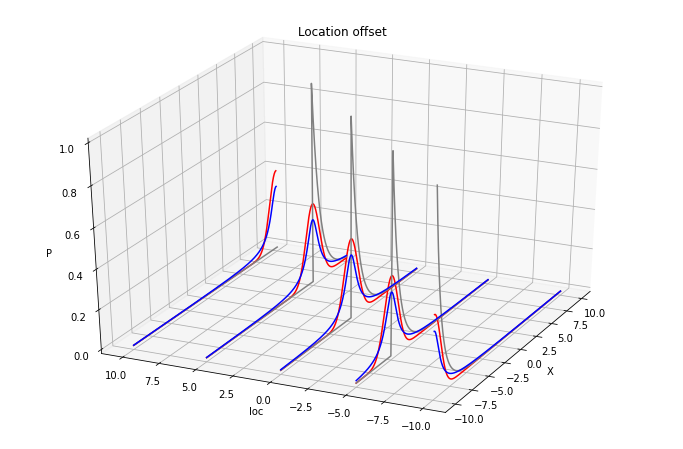

In [18]:
X_ = np.arange(-10, 10.001, 0.01)
Y_ = np.arange(-10, 11, 5)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection="3d")

for j,y in enumerate(Y_):
    ax.plot3D(X_, np.full(len(X_),y), norm.pdf(X_, loc=y), 'red')
    ax.plot3D(X_, np.full(len(X_),y), expon.pdf(X_, loc=y), 'gray')
    ax.plot3D(X_, np.full(len(X_),y), t.pdf(X_, 1, loc=y), 'blue')

ax.azim = -155
ax.dist = 10
ax.elev = 30
# #
ax.set_xlabel('X')
ax.set_ylabel('loc')
ax.set_zlabel('P')
# # 
ax.set_title(f'Location offset')
# #  
plt.show()

####scale

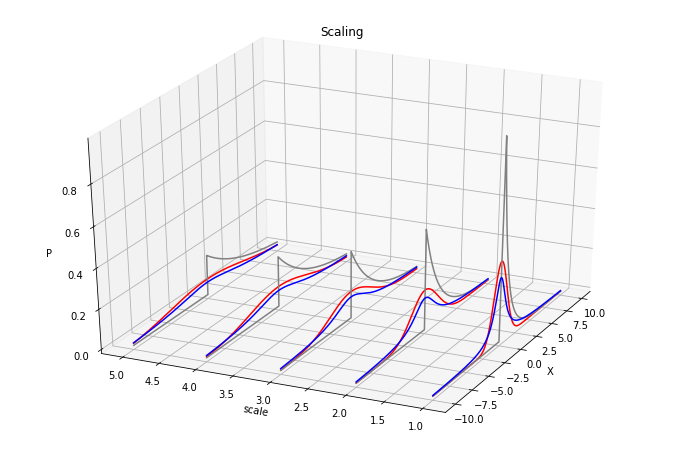

In [30]:
X_ = np.arange(-10, 10, 0.01)
Y_ = np.arange(0, 6, 1)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection="3d")

for j,y in enumerate(Y_):
  if y!=0:
    ax.plot3D(X_, np.full(2000,y), norm.pdf(X_, scale=y), 'red')
    ax.plot3D(X_, np.full(2000,y), expon.pdf(X_, scale=y), 'gray')
    ax.plot3D(X_, np.full(2000,y), t.pdf(X_, 1, scale=y), 'blue')

ax.azim = -155
ax.dist = 10
ax.elev = 30
# #
ax.set_xlabel('X')
ax.set_ylabel('scale')
ax.set_zlabel('P')
# # 
ax.set_title(f'Scaling')
# #  
plt.show()

####df

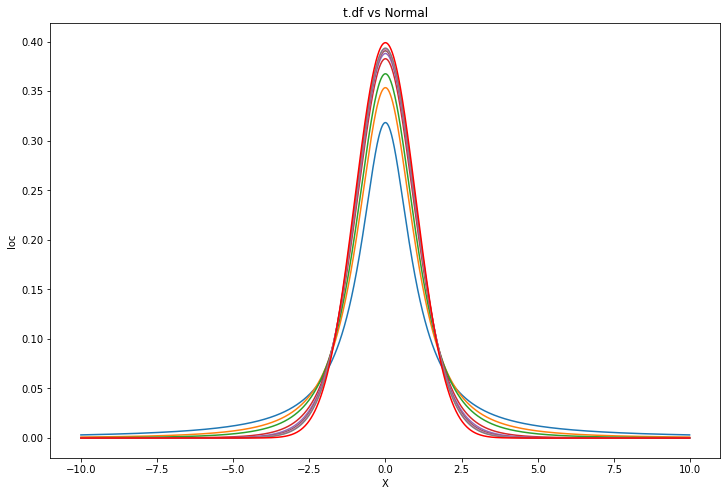

In [23]:
X_ = np.arange(-10, 10, 0.01)
Y_ = np.append(np.arange(1, 3, 1),np.arange(3,21,3)) 

fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

for j,y in enumerate(Y_):
    # ax.plot(X_, expon.pdf(X_, scale=y), label = j)
    # ax.plot(X_, norm.pdf(X_))#, scale=y))#, 'gray')
    # ax.plot(X_, expon.pdf(X_))#, scale=y))#, 'red')
    ax.plot(X_, t.pdf(X_, y))#, scale=y))#, 'blue')

ax.plot(X_, norm.pdf(X_), 'red')

ax.azim = -155
ax.dist = 10
ax.elev = 30
# #
ax.set_xlabel('X')
ax.set_ylabel('loc')
# ax.set_zlabel('P')
# # 
ax.set_title(f't.df vs Normal')
#
# fig.legend()
# #  
plt.show()

как видно на визуализации:
- loc отвечает за смещение центра распределения (а точнее - задаёт расположение среднего значения)
- scale - отвечает за дисперсию распределения (а точнее - задаёт стандартное отклонение)

Значение параметра df по визуализации понять сложно. Видно только, что при его увеличении функция плотности t-распределения всё больше приближается к функции плотности нормального распределения. на самом деле df задаёт количество степеней свободы для t-распределения, поэтому логично, что при увеличении степеней свободы случайной величины она будет всё больше походить на нормально распределённую 